This notebook shows how to read specific shapefiles from `GSHHG` found [here](https://www.ngdc.noaa.gov/mgg/shorelines/data/gshhg/latest/). These have the most delineation of islands. 

In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
df_land_cont = gpd.read_file('GSHHS_shp/h/GSHHS_h_L1.shp')
df_antartica = gpd.read_file('GSHHS_shp/h/GSHHS_h_L6.shp')

We are going to buffer by 1 degree which is about 100 km. This allows the intersection to be performed significantly faster. We are not so interested in the precise intersection geometry, more abot tracking all the tiny land masses around the globe.

In [3]:
df_land = pd.concat([df_land_cont, df_antartica], axis=0)[['geometry']].copy()
df_land.geometry = df_land.geometry.buffer(1)
df_land = df_land.dissolve()

/var/folders/s6/fbsc26cd0ddffbp3_knts_9c0wcxj1/T/ipykernel_68544/3683562747.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_land.geometry = df_land.geometry.buffer(1)


<AxesSubplot:>

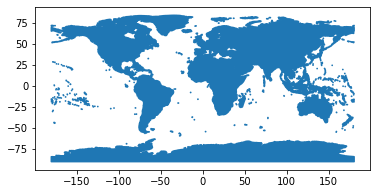

In [4]:
df_land.plot()

We will save this for our frame generation.

In [5]:
df_land.to_file('usgs_land_1deg_buffered.geojson', driver='GeoJSON')